* 보험 데이터 셋은 나이, 성별, BMI, 자녀 수, 흡연 여부, 지역, 보험료를 포함하는 7개의 변수로 구성
* 7개의 변수 중에서 나이와 BMI 변수를 사용하여 DBSCAN 알고리즘에 이상치 탐지 실습 진행

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import DBSCAN 

import warnings 
warnings.filterwarnings("ignore") 



sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.set_context('talk')

df = pd.read_csv("insurance.csv") 
print(df.head())
X=df[['age', 'bmi']].values


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520



DBSCAN(min_sample, eps)은 군집 알고리즘이고, 매개변수가 2개를 사용 (min_sample, eps)
* 랜덤으로 데이터 포인트를 뽑고, 데이터 포인트에서 eps(epsilon)의 거리(기본값은 유클리디안 거리)안에 데이터 포인트 탐색.
* 만약 찾은 포인트가 min_sample수보다 적으면 noise로 처리하고, min_sample보다 많으면 새로운 클러스터 레이블 할당
* 새로운 클러스터에 할당된 포인트들의 eps 거리 안의 모든 이웃을 찾아서 클러스터 레이블이 할당되지 않았다면 현재의 클러스터에 포함.
* 더 이상 데이터 포인가 없으면 클러스터 레이블이 할당되지 않은 데이터 포인트들에 대해 1~3 반복


Text(0, 0.5, 'BMI')

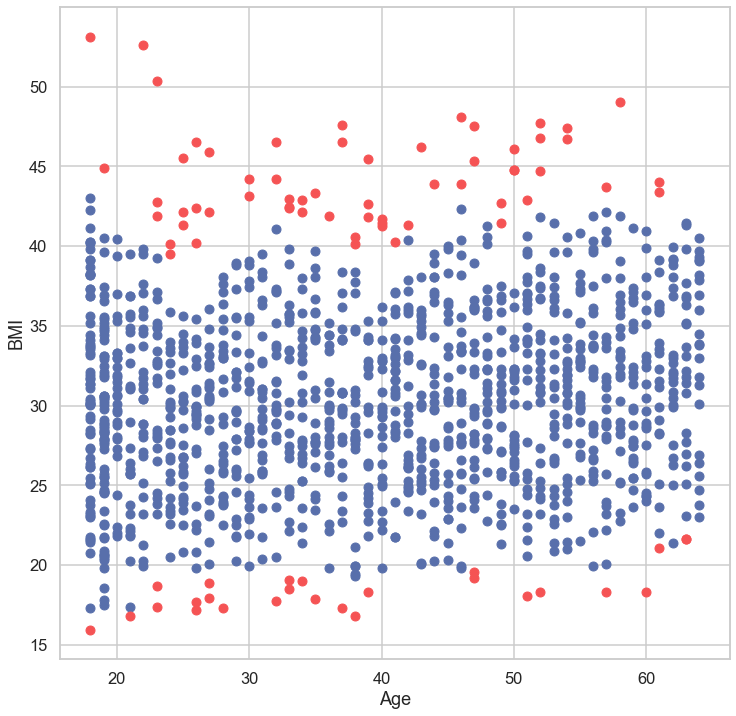

In [16]:
# 모델을 정의 (esp=2.5, min_samples는 13)하고, fit을 사용
dbscan = ?

# DBSCAN으로 모든 데이터 중 이상치로 분류한 데이터를 구하기 위한 라벨링
labels = dbscan.labels_ 

# 이상치 확인
pd.Series(labels).value_counts()

plt.figure(figsize=(12,12)) 

unique_labels = set(labels) 
colors = ['#586fab', '#f55354'] 

for color,label in zip(colors, unique_labels): 
    sample_mask = [True if l == label else False for l in labels] 
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color); 
plt.xlabel('Age') 
plt.ylabel('BMI')
